This notebook demonstrates the time-evolution of a two-state system under constant external electric field, and the Rabi oscillations. First, import qutip, numpy, and matplotlib.pyplot for plotting.

In [103]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

The numerical parameters of the system are as follows:

In [104]:
wa = 0.5*2*np.pi
w_rabi = 0.01*2*np.pi
w_rf = 0.5*2*np.pi

Define useful operators:

In [105]:
sx = sigmax()
sz = sigmaz()

The Hamiltonian of the system is then known as below (working in $\hbar = 1$). First, time-independent $H_0$.

In [106]:

H0 = 0.5*wa*sz


Then the RF driving term and its time dependence.

In [107]:
H1 = w_rabi*sx
def H1_coeff(t, args):
    return np.cos(args['w_rf']*t)

Finally, the complete Hamiltonian.

In [108]:
H = [H0, [H1, H1_coeff]]
args = {'w_rf' : w_rf}

Given the initial state $\psi_0 = \mid 0 >$ solve the Schrodinger Eq. and obtain the time-evolution of the expectation of $\sigma_z$:

In [109]:
psi0 = basis(2,0)
times = np.linspace(0.0, 50.0, 400)
result = sesolve(H, psi0, times, [sz], args=args)

Plot $\sigma_z$:

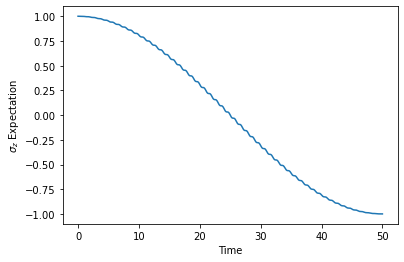

In [110]:
fig = plt.plot(result.times, result.expect[0])
plt.xlabel("Time")
plt.ylabel(r"$\sigma_z$ Expectation")
plt.show()